### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [17]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
# Group by date and count the number of pickups
pickup_counts = df.groupby(df['Date/Time'].dt.date).size()
# Find the date with the highest number of pickups
date_with_highest_pickups = pickup_counts.idxmax()

In [18]:
date_with_highest_pickups

datetime.date(2014, 8, 7)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [19]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
count_of_pickups = pickup_counts.loc[date_with_highest_pickups]


# Get the count of pickups on the highest date

count_of_pickups


32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [21]:
# Count the number of unique TLC base companies

num_unique_tlc_base_companies = df['Base'].nunique()

num_unique_tlc_base_companies

5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [23]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base_company = df.groupby('Base').size()

base_company_with_highest_pickups = pickup_counts_by_base_company.idxmax()

# Find the TLC base company with the highest number of pickups
print(base_company_with_highest_pickups)

B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [24]:
# Group by TLC base company and count the number of pickups
pickup_counts_by_base_company = df.groupby('Base').size()


print(pickup_counts_by_base_company)

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [29]:
# Extract the hour from the 'Date/Time' column
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
pickup_counts_by_hour = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
hour_with_highest_pickups = pickup_counts_by_hour.idxmax()

print(hour_with_highest_pickups)


17


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

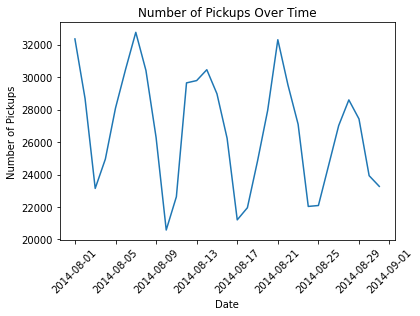

In [34]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups

df['Date'] = df['Date/Time'].dt.date
pickup_counts_by_date = df.groupby('Date').size()

# Create a line plot to visualize the number of pickups over time
plt.plot(pickup_counts_by_date.index, pickup_counts_by_date.values)
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups Over Time')
plt.xticks(rotation=45)
plt.show()

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

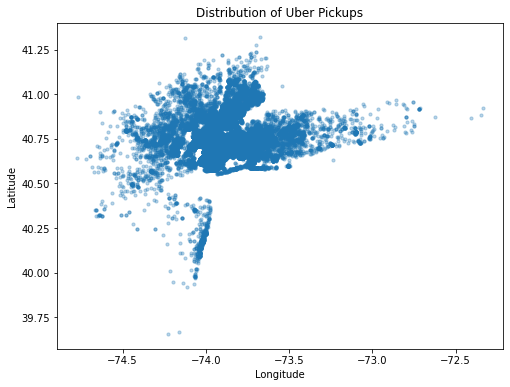

In [44]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude

plt.figure(figsize=(8, 6))
plt.scatter(df['Lon'], df['Lat'], s=10, alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Uber Pickups')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

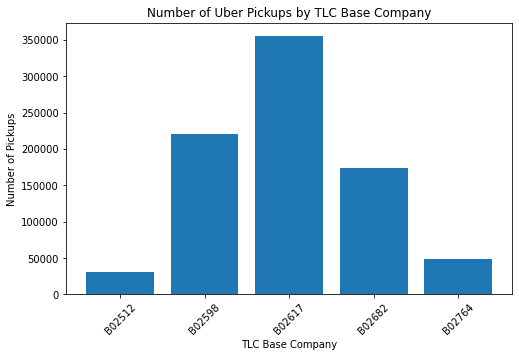

In [53]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company

plt.figure(figsize=(8, 5))
plt.bar(pickup_counts_by_base_company.index, pickup_counts_by_base_company.values)
plt.xlabel('TLC Base Company')
plt.ylabel('Number of Pickups')
plt.title('Number of Uber Pickups by TLC Base Company')
plt.xticks(rotation=45)
plt.show()

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

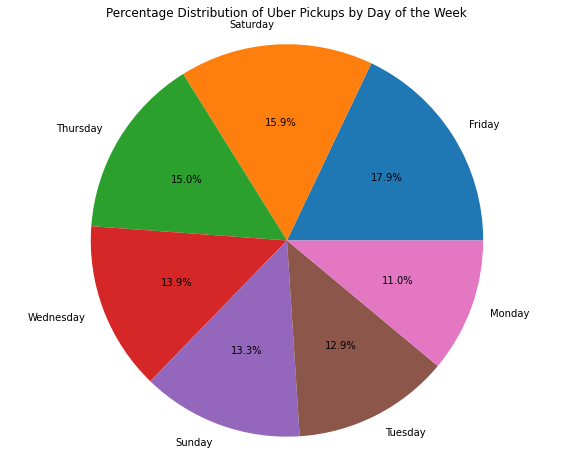

In [58]:
# Group by day of the week and count the number of pickups

df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = df['DayOfWeek'].map(lambda x: weekday_names[x])
pickup_counts_by_day = df['DayOfWeek'].value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.figure(figsize=(10,8))
plt.pie(pickup_counts_by_day, labels=pickup_counts_by_day.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Uber Pickups by Day of the Week')
plt.axis('equal')
plt.show()